In [65]:
import pandas as pd

# Load dataset
df = pd.read_csv('../rawdata/combine.csv')

# Tampilkan 5 baris pertama
df.head()


,Title,FullText,Author,Url,Date,label,source
0,5 Pemeran Penting Jurassic World Rebirth dan K...,Jurassic World Rebirthmenjadi saga terbaru dar...,Penulis tidak ditemukan,https://www.cnnindonesia.com/hiburan/202507071...,2025/07/08 06:31:08,0,cnnindonesia_scraped_08072025.csv
1,[HOAX] “Panglima TNI yang Baru Marsekal Hadi T...,“Sudah diklarifikasi melalui akun Twitter @_TN...,Bentang Febrylian,https://turnbackhoax.id/2017/12/11/hoax-pangli...,"Desember 11, 2017",1,turnbackhoax
2,[SALAH] Warga MB Ketapang Kotawaringin Timur S...,"Warga\nwilayah Kecamatan MB Ketapang, Kabupate...",Bentang Febrylian,https://turnbackhoax.id/2020/05/13/salah-warga...,"Mei 13, 2020",1,turnbackhoax
3,[BERITA] “Viral Karnaval TK Bercadar dan ‘Bers...,"“Sabtu 18 Agustus 2018, 18:28 WIB\nViral Karna...",Aribowo Sasmito,https://turnbackhoax.id/2018/08/19/berita-vira...,"Agustus 19, 2018",1,turnbackhoax
4,"Diduga Jadi Mata-mata, 2 WN China Ditangkap FB...",FBImenangkap dua warga negara China di Amerika...,Yogi Ernes,https://news.detik.com/internasional/d-7991528...,2025/07/02 04:57:01,0,detik_scraped_02072025.csv


In [66]:
# Ukuran dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Tipe data
df.info()

# Statistik deskriptif numerik
df.describe()


Jumlah baris: 16000
Jumlah kolom: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     16000 non-null  object
 1   FullText  16000 non-null  object
 2   Author    15886 non-null  object
 3   Url       16000 non-null  object
 4   Date      8607 non-null   object
 5   label     16000 non-null  int64 
 6   source    16000 non-null  object
dtypes: int64(1), object(6)
memory usage: 875.1+ KB


,label
count,16000.000000
mean,0.500000
std,0.500016
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [67]:
df.isnull().sum()

Title          0
FullText       0
Author       114
Url            0
Date        7393
label          0
source         0
dtype: int64

<Axes: title={'center': 'Distribusi Label Hoaks vs Valid'}, xlabel='label'>

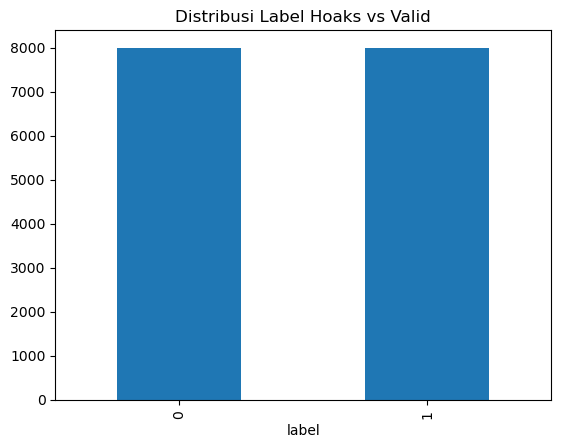

In [68]:
df['label'].value_counts().plot(kind='bar', title='Distribusi Label Hoaks vs Valid')

In [69]:
df.columns

Index(['Title', 'FullText', 'Author', 'Url', 'Date', 'label', 'source'], dtype='object')

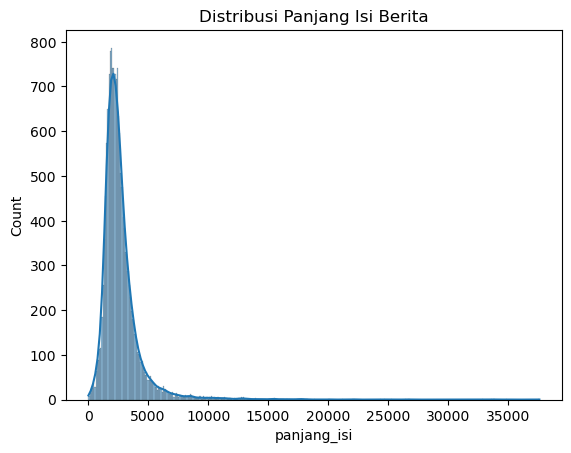

In [70]:
# Tambah kolom panjang isi
df['panjang_isi'] = df['FullText'].astype(str).apply(len)

# Statistik panjang isi
df['panjang_isi'].describe()

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['panjang_isi'], kde=True)
plt.title('Distribusi Panjang Isi Berita')
plt.show()


In [71]:
df.duplicated().sum()

0

In [72]:
from collections import Counter
import re

def bersihkan(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Gabungkan semua teks
all_text = ' '.join(df['FullText'].dropna().apply(bersihkan))

# Hitung kata terbanyak
kata_terbanyak = Counter(all_text.split()).most_common(20)
print(kata_terbanyak)


[('yang', 139735), ('di', 98712), ('dan', 95269), ('dengan', 51192), ('itu', 48821), ('dari', 45601), ('ini', 42376), ('tidak', 41993), ('dalam', 40876), ('untuk', 39728), ('pada', 38620), ('tersebut', 37302), ('juga', 35122), ('ada', 25156), ('indonesia', 23073), ('akan', 22950), ('partai', 22877), ('ke', 22014), ('oleh', 21802), ('bahwa', 20804)]
